# Image Segmentation
---
이미지 분류(image classification), 객체 인식(object detection) 모델은 이미지에서 어떤 물체의 종류를 분류하거나 물체의 존재와 위치를 탐지한다  
세그멘테이션(segmentation)은 픽셀 수준에서 이미지의 각 부분이 어떤 의미를 갖는 영역인지 분리해 내는 방법  

이미지 내에서 영역을 분리하는 접근 방식
- 시맨틱 세그멘테이션(semantic segmentation)
- 인스턴스 세그멘테이션(instance segmentation)

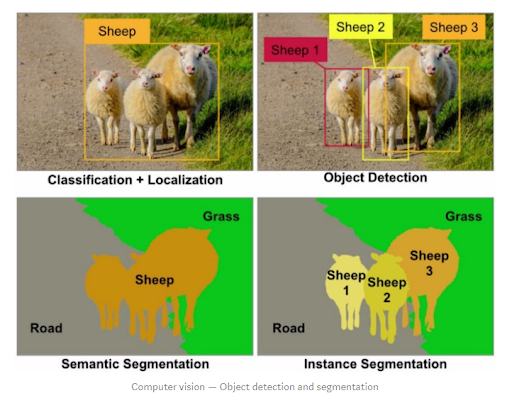  

먼저 위 그림의 상단 두 사진을 볼까요? 좌상단 사진은 양들이 길에 있는 사진에서 단지 어떤 물체들이 모여 있는 영역의 위치를 인식(localization)과 이 물체들이 양이라는 것을 판별(classification)하는 접근법을 보여줍니다. 그러나 우상단 사진은 비슷하지만 개별 양들의 개체 하나하나의 위치를 정확히 식별하는 객체 인식(object detection)의 접근법을 보여 줍니다.

하단의 두 사진도 이와 비슷한 대비를 보여줍니다. 두 사진 모두 세그멘테이션의 결과를 보여주는 사진이라는 점에서 동일합니다. 좌하단의 경우 양, 길, 풀밭의 영역을 정확히 구분해낼 뿐 양들 각각의 구분해 내진 않습니다. 이런 접근 방식을 시맨틱 세그멘테이션 이라고 합니다. 그러나 우하단의 경우 각 양의 개체들의 영역을 픽셀 단위로 정확히 구분해 내고 있습니다. 이것은 인스턴스 세그멘테이션 의 사례가 됩니다.

### 시맨틱 세그멘테이션(Semantic Segmentation)

#### U-Net
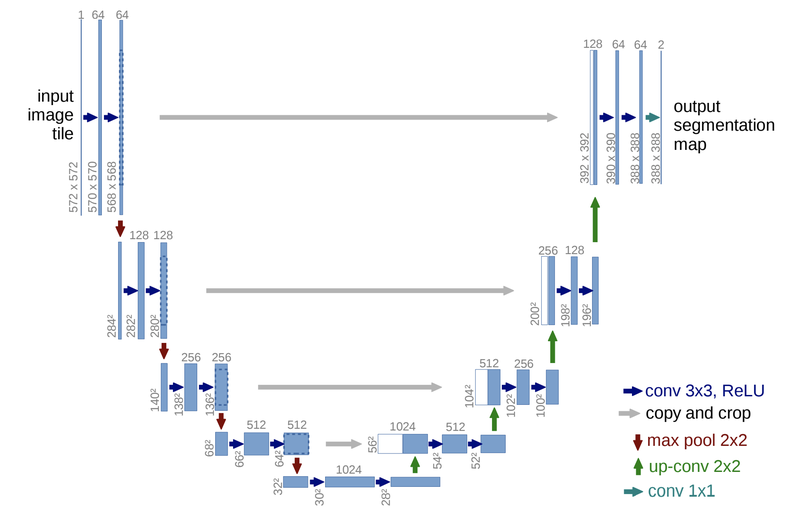  

입력으로 572x572 크기인 이미지가 들어가고 출력으로 388x388의 크기에 두 가지의 클래스를 가진 세그멘테이션 맵(segmentation map)이 나옵니다  
두 가지 클래스는 가장 마지막 레이어의 채널 개수가 "2"라는 점에서 확인할 수 있다    

이때 두 가지의 클래스를 문제에 따라 다르게 정의하면 클래스에 따른 시맨틱 세그멘테이션 맵(semantic segmentation map) 을 얻을 수 있다  
처음 봤던 예제의 인물사진 모드라면 사람의 영역과 배경 클래스를, 의료 인공지능에서는 세포 사진에서 병이 있는 영역과 정상인 영역 등을 지정해 적용할 수 있습니다.

이전에 우리가 봤던 이미지 분류나 물체 검출 문제보다 확실히 큰 출력값을 볼 수 있는데요. 그 이유는 세그멘테이션을 위해서 이미지의 각 픽셀에 해당하는 영역의 클래스별 정보가 필요하기 때문입니다.

### 인스턴스 세그멘테이션(Instance Segmentation)

인스턴스 세그멘테이션은 같은 클래스 내에서도 각 개체(instance)들을 분리하여 세그멘테이션을 수행  

#### Mask R-CNN
2017년에 발표된 Mask-R-CNN은 2-Stage Object Detection의 가장 대표적인 Faster-R-CNN을 계승한 것

Faster-R-CNN의 아이디어인 Region of Interest Pooling Layer(RoIPool) 개념을 개선하여  
정확한 Segmentation에 유리하게 한 **RoIAlign**, 그리고 **클래스별 마스크 분리**라는  

단순한 두 가지 아이디어를 통해, 클래스별 Object Detection과 시멘틱 세그멘테이션을 사실상 하나의 Task로 엮어낸 것으로 평가받는 중요한 모델  
**Faster-R-CNN 계열에서 사용하는 RoIPool** 개념과 그 한계점  
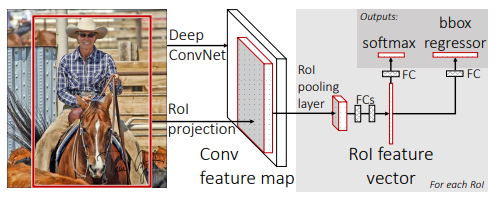  
다양한 RoI 영역을 Pooling을 통해 동일한 크기의 Feature map으로 추출해 내는 레이어  
이후 이 고정 사이즈의 Feature map을 바탕으로 바운딩 박스와 object의 클래스를 추론  

object 영역의 정확한 마스킹을 필요로 하는 Segmentation 문제에서 RoIPool 과정에서 **Quantization이 필요**하다는 문제 발생  
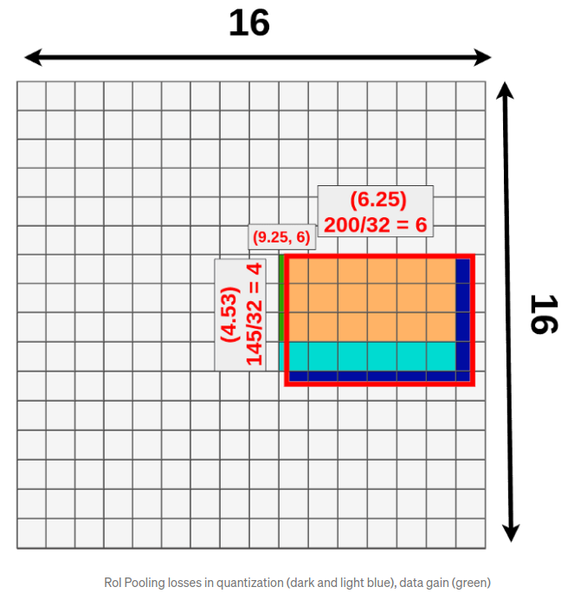  
위 그림의 예에서는 16X16으로 분할  
이미지에서 RoI 영역의 크기는 다양한데, 모든 RoI 영역의 가로/세로 픽셀 크기가 16의 배수인 것은 아니다  
그림의 예에서 가로 200, 세로 145픽셀짜리 RoI 영역을 16X16으로 분할된 영역 중 절반 이상이 RoI 영역에 덮이는 곳들로 끼워 맞추다 보면,  
어쩔 수 없이 RoI 영역 밖이 포함되는 경우도 있고, 자투리 영역이 버려지는 경우 발생

이런 상황은 필연적으로 시맨틱 세그멘테이션의 정보손실과 왜곡을 야기한다  


#### Mask-R-CNN의 RoIAlign 
**Quantization하지 않고도 RoI를 처리**할 고정 사이즈의 Feature map을 생성할 수 있게 아이디어를 제공  
아이디어의 핵심은, RoI 영역을 pooling layer의 크기에 맞추어 등분한 후,  
RoIPool을 했을 때의 quantization 영역 중 가까운 것들과의 bilinear interpolation 계산을 통해 생성해야 할 Feature Map을 계산해 낸다는 점  

Mask R-CNN은 Faster R-CNN에서 특성 추출방식을 "RoIAlign" 방식으로 개선을 하고 세그멘테이션을 더한 방식  

아래 Faster R-CNN과 비교한 구조도를 보면 U-Net처럼 피처 맵(feature map)의 크기를 키워 마스크(mask)를 생성해 내는 부분을 통해 인스턴스에 해당하는 영역(인스턴스 맵)을 추론  

Mask R-CNN은 클래스에 따른 마스크를 예측할 때, 여러 가지 태스크를 한 모델로 학습하여 물체 검출의 성능을 높인다  

아래 그림을 보시면 Bounding box regression을 하는 Bbox head와 마스크를 예측하는 Mask Head의 두 갈래로 나뉘는 것을 볼 수 있는데  
Mask map의 경우 시맨틱 세그멘테이션과 달리 상대적으로 작은 28x28의 특성 맵 크기를 갖는다  

RoIAlign을 통해 줄어든 특성에서 마스크를 예측하기 때문에 사용하려는 목적에 따라서 정확한 마스크를 얻으려는 경우에는 부적합할 수 있다
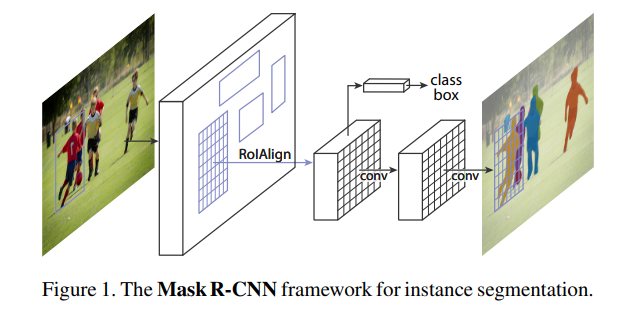  
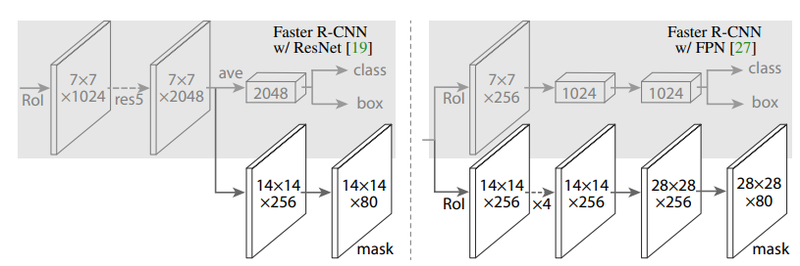  





---
## FCN: Fully Convolutional Network
---
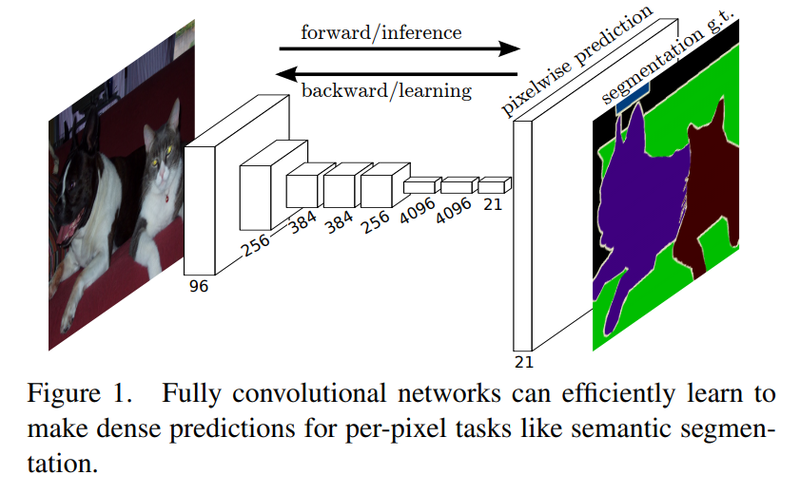  
FCN은 이미지넷 챌린지(ImageNet Challenge)에서 좋은 성적을 거두었던 AlexNet, VGG-16 등의 모델을 세그멘테이션에 맞게 변형한 모델  

FCN에서는 세그멘테이션을 하기 위해서 네트워크 뒷단에 기본적인 VGG 모델은 이미지의 특성을 추출하기 위한 네트워크의 뒷단에 
계산한 클래스별 확률을 바탕으로 이미지 분류를 수행하지만 위치를 고려하지 않는 fully connected layer 대신 
위치정보를 유지하면서 클래스 단위의 히트맵(heat map)을 얻어 세그멘테이션을 하기 위해 **CNN**을 붙여준다

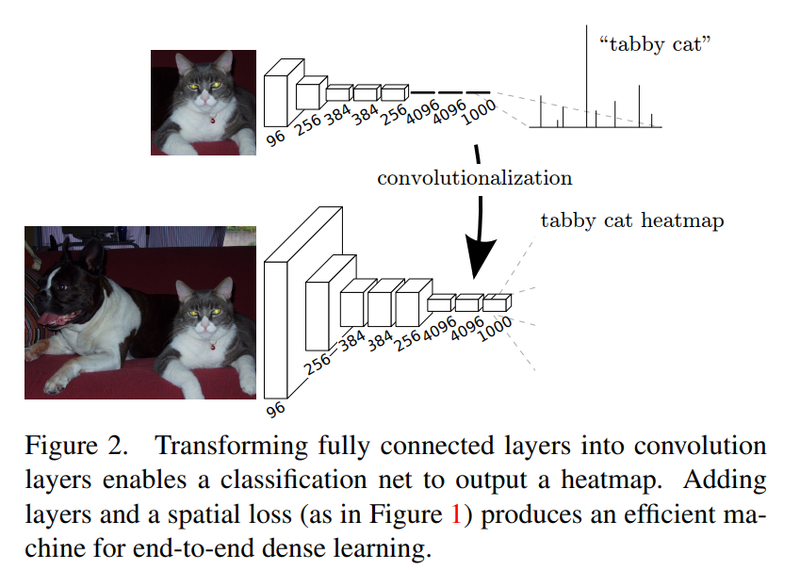  

마지막 CNN은 1x1의 커널 크기(kernel size)와 클래스의 개수만큼의 채널을 갖능다 
이렇게 CNN을 거치면 클래스 히트맵을 얻을 수 있다

하지만 히트맵의 크기는 CNN과 pooling 레이어를 거치면서 크기가 줄었기 때문에 일반적으로 원본 이미지보다 작다

이를 키워주는 방법을 **Upsampling**  
Upsampling 여러 가지 방법 중 FCN에서는 **Deconvolution**과 **Interpolation** 방식을 활용  
- **Deconvolution** : 컨볼루션 연산을 거꾸로 해준 것  
- **Interpolation(보간법)** : 주어진 값들을 통해 추정해야 하는 픽셀(여기서는 특성 맵의 크기가 커지면서 메꾸어야 하는 중간 픽셀) 추정하는 방법 

Upsampling만 하면 원하는 세그멘테이션 맵을 얻을 수 있다 : **FCN-32s**  
하지만 논문에서는 더 나은 성능을 위해서 한 가지 기법 추가 : **Skip Architecture**
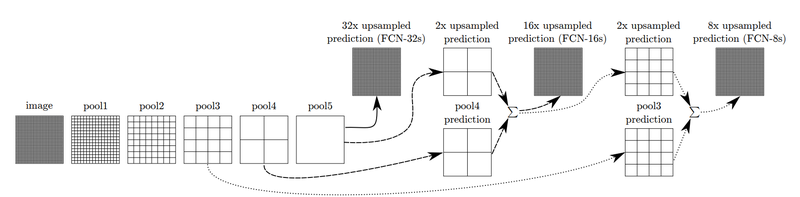  

논문에서는 FCN-32s, FCN-16s, FCN-8s로 결과를 구분해 설명  
- FCN-16s : 앞쪽 블록에서 얻은 예측 결과 맵과, 2배로 upsampling한 맵을 더한 후, 한 번에 16배로 upsampling  
- FCN-8s : FCN-16s 에서 한 번 더 앞쪽 블록을 사용  
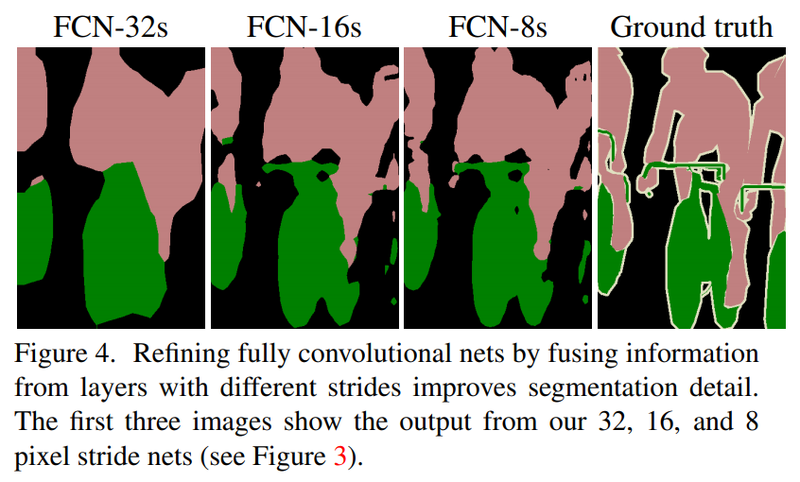  

---
## U-Net
---
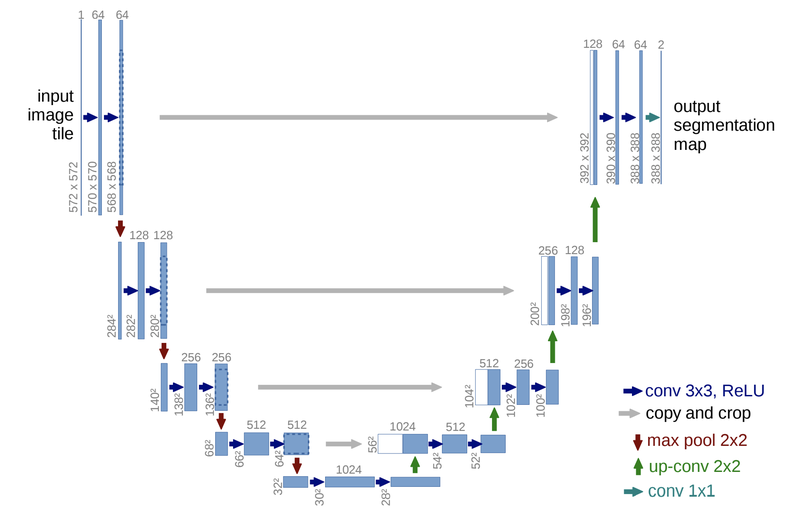  

Net은 이름에서 볼 수 있듯이 네트워크 구조가 U자 형태를 띠고 있다  
FCN에서 upsampling을 통해서 특성 맵을 키운 것을 입력값과 대칭적으로 만들어 준 것  

특이한 점은 U-Net이 세그멘테이션뿐만 아니라 여러 가지 이미지 태스크에서 사용되는 유명한 네트워크가 되었지만,  
본래 의학 관련 논문으로 시작되었다 (논문 제목에서도 biomedical image segmentation을 위한 네트워크)  
세포의 영역을 세그멘테이션 하기 위해 개발된 방법  

### 전체 구조
논문에서는 네트워크 구조를 좌측의 **Contracting path**와 우측의 **Expansive path** 두 가지로 구분  

좌측의 **Contracting path**는 일반적으로 우리가 사용해왔던 Convolution network와 유사한 구조  
각 블록은 두 개의 3x3 convolution 계층과 ReLu를 가지고  
그 뒤로 downsampling을 위해서 2x2의 커널을 2 stride로 max pooling  
Downsampling을 거친 후 다음 convolution의 채널 크기는 두 배씩 늘어나도록 설계  

**Expansive path**에서는  
각 블록에 2x2 up-convolution이 붙어 채널이 절반씩 줄어들고 특성 맵의 크기는 늘어난다  
Expansive path의 블록은 contracting block과 동일하게 3x3 convolution이 두 개씩 사용  

두 Path에서 low-level의 feature를 활용할 수 있도록 크기가 같은 블록의 출력과 입력은 skip connection처럼 연결  
#### skip connection의 목적
- 원본 이미지의 로컬 정보를 보존하고, 더 정확한 세그멘테이션 결과를 얻기 위함  
- skip connection은 Contracting Path의 특징 맵과 Expanding Path의 특징 맵을 결합하여 정보의 흐름을 유지 하고, 그레이디언트(gradient)가 잘 전파되도록 돕는다  
- U-Net은 고해상도의 세그멘테이션 맵을 생성하면서도 작은 객체와 객체의 경계에 대한 정확도 향상 가능  
 
마지막에는 1x1 convolution으로 원하는 시맨틱 세그멘테이션 맵을 얻을 수 있다   

결과적으로는, 입력으로 572x572 크기인 이미지가 들어가고 출력으로 388x388의 크기에 두 가지의 클래스를 가진 세그멘테이션 맵(segmentation map)이 나온다  

마지막 세그멘테이션 맵의 크기가 입력 이미지와 다른 것은 세그멘테이션 맵을 원하는 크기로 조정하여(resize) 해결 가능 

원본 이미지에 맞게 크기를 조정해 주면 원하는 시맨틱 세그멘테이션 결과를 얻을 수 있다  

### 타일(Tile) 기법
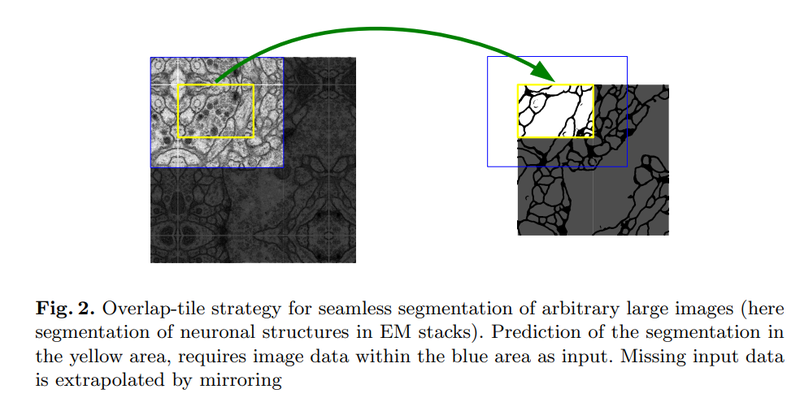  
U-Net의 또 다른 차이는 얻을 수 있는 세그멘테이션 맵의 해상도  
FCN은 입력 이미지의 크기를 조정하여 세그멘테이션 맵을 얻어냈지만    
U-Net은 타일(tile) 방식을 사용해서 어느 정도 서로 겹치는 구간으로 타일을 나누어 네트워크를 추론  
큰 이미지에서도 높은 해상도의 세그멘테이션 맵을 얻을 수 있도록 했다  

### 데이터 불균형 해결
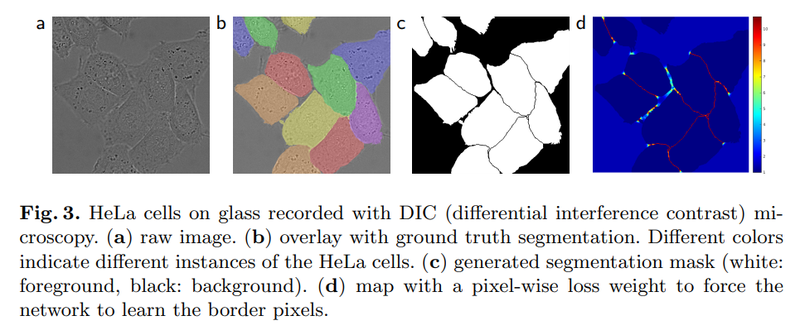  
세포를 검출해 내기 위해서는 세포들의 영역뿐만 아니라 경계 또한 예측을 해야 한다  
이때 픽셀 단위로 라벨을 매긴다고 생각하면, 데이터셋에 세포나 배경보다는 절대적으로 세포 간 경계의 면적이 작다  

이러한 클래스 간 데이터 양의 불균형을 해결해 주기 위해서 분포를 고려한 **weight map**을 학습 때 사용  
여기서 **weight는 손실 함수(loss)에 적용되는 가중치** (신경망의 학습 파라미터를 가리키는 weight 아님)  

의료 영상에서 세포 내부나 배경보다는 상대적으로 면적이 작은 세포 경계를 명확하게 추론해 내는 것이 더욱 중요하기 때문에,  
세포 경계의 손실에 더 많은 페널티를 부과하는 방식  

---
## DeepLab 계열
---
DeepLabv3+는 이름에서 볼 수 있듯이 이전의 많은 버전을 거쳐 개선을 이뤄온 네트워크  

처음 DeepLab 모델이 제안된 뒤 이 모델을 개선하기 위해  
Dilated Convolution이라고도 불리는 Atrous Convolution과 Spatial Pyramid Pooling 등 많은 방법들이 제안되어 왔다  

### 전체구조
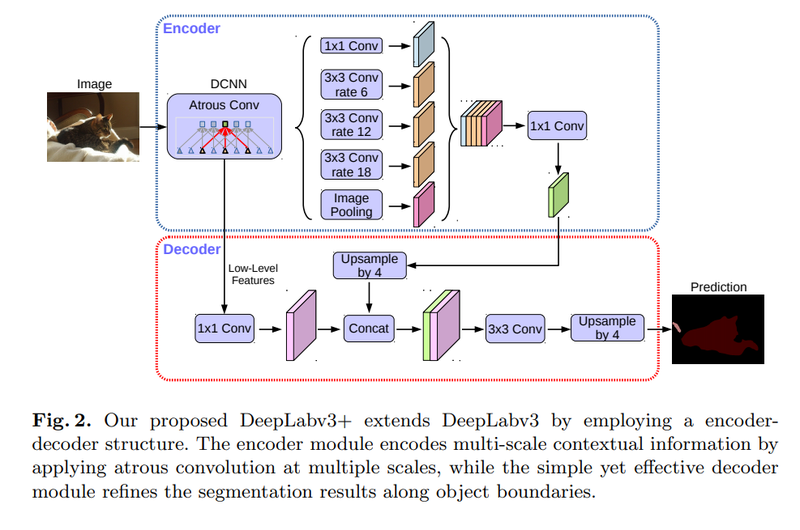  

U-Net에서의 Contracting path과 Expansive path의 역할을 하는 것이  
DeepLabV3+ 에서는 위 그림의 인코더(Encoder), 디코더(Decoder)  

**인코더**는 이미지에서 필요한 정보를 특성으로 추출해 내는 모듈  
**디코더**는 추출된 특성을 이용해 원하는 정보를 예측하는 모듈  

3x3 convolution을 사용했던 U-Net과 달리 DeepLabV3+는 **Atrous Convolution을 사용**  
Atrous Convolution을 여러 크기에 다양하게 적용한 것이 **ASPP(Atrous Spatial Pyramid Pooling)**  

DeepLab V3+는 ASPP가 있는 블록을 통해 특성을 추출하고 디코더에서 Upsampling을 통해 세그멘테이션 마스크를 얻고 있다  

### Atrous Convolution
Atrous Convolution은 간단히 말하면 "띄엄띄엄 보는 컨볼루션"
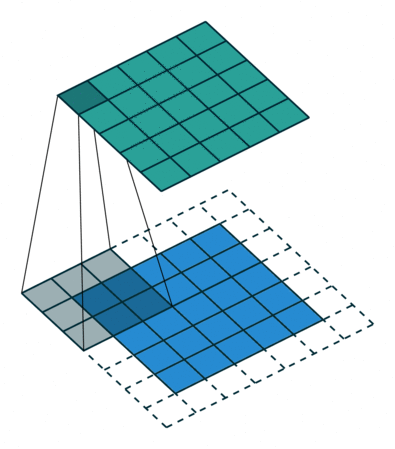
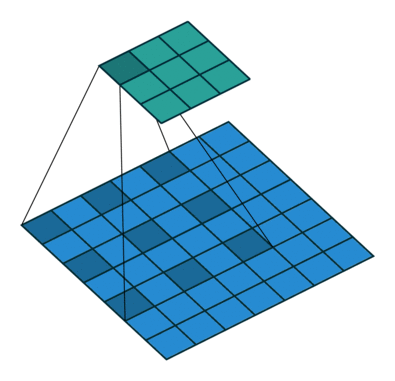  

Atrous Convolution은 일반적인 컨볼루션과 달리 더 넓은 영역을 보도록 해주기 위한 방법으로 커널이 일정 간격으로 떨어져 있다  
이를 통해 컨볼루션 레이어를 너무 깊게 쌓지 않아도 넓은 영역의 정보를 커버 가능  

기존의 컨볼루션(Convolution)은 일반적으로 고정 크기의 필터를 사용하여 입력 이미지를 스캔  
이러한 방법은 필터의 크기가 커질수록 공간 해상도가 감소하는 문제
작은 객체 또는 상세한 구조를 정확하게 탐지하고 분할하는 데 어려움

Atrous Convolution은 이 문제를 해결하기 위해 제안된 방법  
Atrous Convolution은 기존의 컨볼루션과는 달리, 필터 내에 빈 공간을 만들어 줌으로써 receptive field를 확장할 수 있다  
파라미터 조절을 통해 필터의 receptive field를 증가시킬 수 있으며, 동시에 입력 이미지의 공간 해상도를 유지할 수 있다  
이를 통해 네트워크는 더 큰 수용 필드를 가지며, 객체의 경계와 세부 정보를 더 잘 인식할 수 있다  

Atrous Convolution은 주로 Dilated Convolution이라고도 불리며, DeepLab, FCN, PSPNet 등과 같은 세그멘테이션 모델에서 널리 사용  

### Spatial Pyramid Pooling
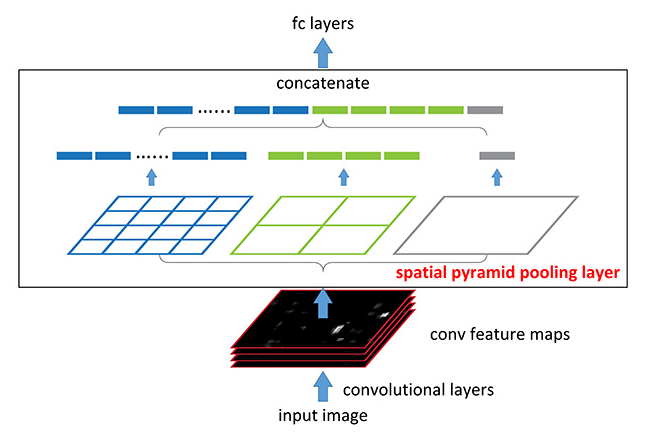  

Spatial Pyramid Pooling은 여러 가지 스케일로 convolution과 pooling을 하고 나온 다양한 특성을 연결(concatenate)  
이를 통해서 멀티스케일로 특성을 추출하는 것을 병렬로 수행하는 효과  

여기서 컨볼루션을 Atrous Convolution으로 바꾸어 적용한 것 : **Atrous Spatial Pyramid Pooling**  

이러한 아키텍쳐는 입력 이미지의 크기와 관계없이 동일한 구조를 활용할 수 있다는 장점  
제각기 다양한 크기와 비율을 가진 RoI 영역에 대해 적용하기에 유리  


---
## 세그멘테이션의 평가
---
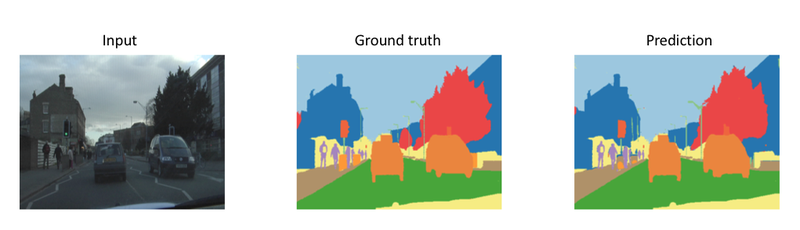  

일반적으로 시맨틱 세그멘테이션의 결괏값은  
이미지의 크기에 맞는 세그멘테이션 맵 크기와 시맨틱 클래스의 수에 맞는 채널 크기를 갖는다  
여기서 각 채널의 max probability에 따라서 해당 위치의 클래스가 결정된다  

### 픽셀별 정확도 (Pixel Accuracy)
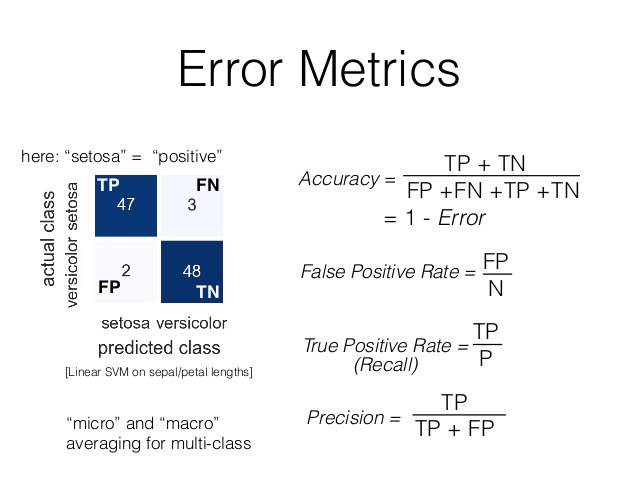  

Pixel Accuracy는 쉽게 말해서 픽셀에 따른 정확도  

세그멘테이션 문제를 픽셀에 따른 이미지 분류 문제로 생각했을 때,  
픽셀별 분류 정확도를 세그멘테이션 모델을 평가하는 기준으로 생각할 수 있다

예측 결과 맵(prediction map)을 클래스 별로 평가하는 경우: 이진 분류 문제(binary classification)로 생각해 픽셀 및 채널 별로 평가  
픽셀 별 이미지 분류 문제로 평가하는 경우: 픽셀 별로 정답 클래스를 맞추었는지 여부, 즉 True/False를 구분  

예를 들어,  
    4x4의 크기를 가지는 map에서 중앙의 2x2의 영역이 전경이고 예측 결과 중 한 칸을 놓쳤습니다.  
Error Metrics를 확인하면 (TP+TN)/(FP+FN+TP+TN)으로 Accuracy를 구할 수 있다.  
- TP(True positive)+ TN(True negative) = 15 : 옳게 분류된 샘플의 수
- FN(False negative): False case는 1인 한 칸은 전경이 배경으로 예측 => 따라서 분모항(FP+FN+TP+TN)은 16
- Pixel Accuracy는 15/16으로 계산할 수 있다.  

### 마스크 IoU (Mask Intersection-over-Union)
물체 검출 모델을 평가할 때  
정답 라벨(ground truth)와 예측 결과 바운딩 박스(prediction bounding box) 사이의 IoU(intersection over union)를 사용  

마스크도 일종의 영역임을 생각했을 때 세그멘테이션 문제에서는 정답인 영역과 예측한 영역의 IoU를 계산 가능  

In [ ]:
# sample for mask iou
intersection = np.logical_and(target, prediction)
union = np.logical_or(target, prediction)
iou_score = np.sum(intersection) / np.sum(union)

마스크 IoU를 클래스 별로 계산하면 한 이미지에서 여러 클래스에 대한 IoU 점수를 얻을 수 있다  
이를 평균하면 전체적인 시맨틱 세그멘테이션 성능 평가 가능  

---
## Upsampling의 다양한 방법
---
지금까지 Segmentation의 종류와 접근 방식에 대해서 알아보았는데요. Segementation에서는 마스킹 단계에 Upsampling이 중요하게 사용되었다는 것을 알 수 있었습니다.
Convolution layer와 다양한 Pooling 등으로 Feature의 크기를 줄여왔는데, 반대로 키우는 방법에는 어떤 방법들이 있을까요?

### Nearest Neighbor
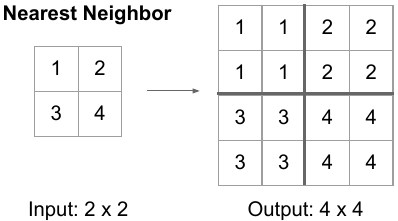  

Nearest upsampling은 이름 그대로 scale을 키운 위치에서 원본에서 가장 가까운 값을 그대로 적용하는 방법입니다. 위 그림처럼 2x2 matrix가 있을 때 이를 2배로 키우면 4x4의 matrix가 됩니다. 이때 좌측 상단으로부터 2x2는 입력 matrix의 1x1과 가장 가깝습니다. 따라서 해당 값을 그대로 사용하게 됩니다.

### Bilinear Interpolation
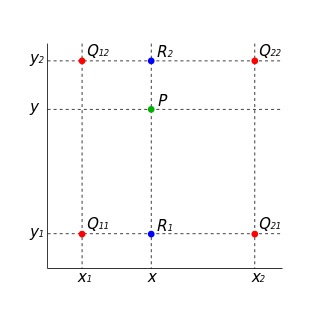  

Bilinear Interpolation은 두 축에 대해서 선형보간법을 통해 필요한 값을 메우는 방식입니다. 우리가 2x2 matrix를 4x4로 upsampling을 할 때 위의 이미지처럼 빈 값을을 채워야합니다. 이에 선형보간법(Linear interpolation)을 사용하는 것인데요, 이때 축을 두 방향으로 활용하기 때문에 Bilinear interpolation이라고 합니다.

위 그림에서 두 가지 interpolation을 적용한 것을 순서대로 확인할 수 있는데요. 
- R1이 Q11과 Q21의 x축방향의 interpolation 결과
- R2는 Q12와 Q22의 x축방향의 interpolation 결과
- R1과 R2를 y축방향으로 interpolation하면 새로운 위치 P의 값을 추정 가능  

이러한 선형 보간 방법으로 Interpolation을 하는 방법이 있고 Bicubic interpolation의 경우 삼차보간법을 사용  

### Transposed Convolution
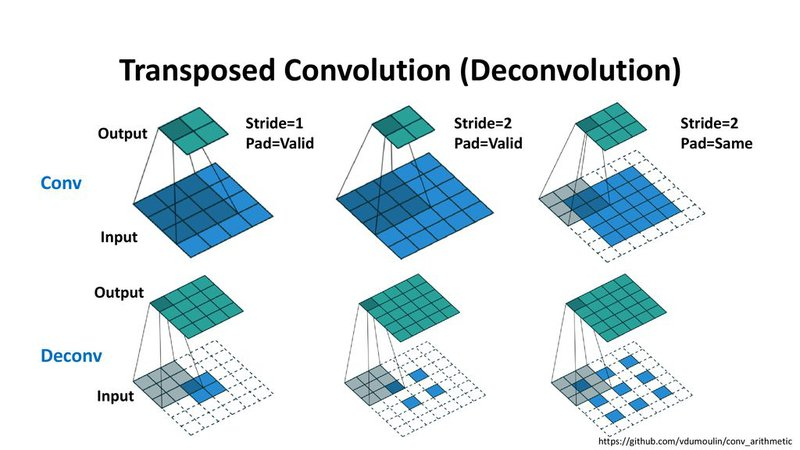  

학습할 수 있는 파라미터를 가진 Upsampling 방법 중 하나

Transposed Convolution은
우리가 사용해왔던 Convolution Layer(Kernel 크기를 정의하고 입력된 Feature를 Window에 따라서 output을 계산) 반대의 연산

거꾸로 학습된 파라미터로 입력된 벡터를 통해 더 넓은 영역의 값을 추정  

#### Convolution
- 입력 이미지의 크기를 줄이고 정보를 추상화하는 작업 - 다운샘플링 수행
- 학습 가능한 파라미터인 필터의 가중치를 사용하여 입력 데이터의 특징을 추출  

#### Transposed Convolution
- Convolution의 역과정을 모방하여 입력과 출력의 공간적인 관계를 반대로 만든다
- 주로 업샘플링 작업에 사용되며, 특징 맵의 크기를 확장  
- 기본적으로 학습 가능한 파라미터를 가지며, 역전파 과정에서 역함수 역할을 수행  








